Procesamiento del Lenguaje Natural

Rodrigo S. Cortez Madrigal

<img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="Logo PCIC" width="128" />  

In [1]:
import wn
import subprocess
import os
import sys
import time
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from fastprogress.fastprogress import master_bar, progress_bar
from pyvis.network import Network

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/roicort/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/roicort/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn

class wn_analyzer():
    def __init__(self, word):
        self.word = word
        self.synonyms = []
        self.hypernyms = []
        self.meronyms = []

    def get_synonyms(self):
        self.synonyms = set()
        for syn in wn.synsets(self.word):
            for lemma in syn.lemmas():
                self.synonyms.add(lemma.name())

    def get_hypernyms(self):
        """
        hypernyms: Y is a hypernym of X if every X is a (kind of) Y (canine is a hypernym of dog)
        """
        self.hypernyms = set()
        for syn in wn.synsets(self.word):
            for hypernym in syn.hypernyms():
                for lemma in hypernym.lemmas():
                    self.hypernyms.add(lemma.name())

    def get_meronyms(self):
        """"
        meronym: Y is a meronym of X if Y is a part of X (window is a meronym of building)"
        """
        self.meronyms = set()
        for syn in wn.synsets(self.word):
            for meronym in syn.part_meronyms():
                for lemma in meronym.lemmas():
                    self.meronyms.add(lemma.name())

    def get_holonyms(self):
        """"
        "holonym: Y is a holonym of X if X is a part of Y (building is a holonym of window) "
        """
        self.holonyms = set()
        for syn in wn.synsets(self.word):
            for holonym in syn.part_holonyms():
                for lemma in holonym.lemmas():
                    self.holonyms.add(lemma.name())

    def get_entailments(self):
        self.entailments = set()
        for syn in wn.synsets(self.word):
            for entailment in syn.entailments():
                for lemma in entailment.lemmas():
                    self.entailments.add(lemma.name())

    def get_graph(self, level):
        G = nx.DiGraph()
        G.add_node(self.word)
        for syn in self.synonyms:
            G.add_node(syn)
            G.add_edge(self.word, syn)
        for hypernym in self.hypernyms:
            G.add_node(hypernym)
            G.add_edge(self.word, hypernym)
        for meronym in self.meronyms:
            G.add_node(meronym)
            G.add_edge(self.word, meronym)
        for holonym in self.holonyms:
            G.add_node(holonym)
            G.add_edge(self.word, holonym)
        for entailment in self.entailments:
            G.add_node(entailment)
            G.add_edge(self.word, entailment)

        mb = master_bar(range(level))
        for i in mb:
            nodes = list(G.nodes())
            for j in progress_bar(range(len(nodes)), parent=mb):
                node = nodes[j]
                for syn in wn.synsets(node):
                    for lemma in syn.lemmas():
                        G.add_node(lemma.name())
                        G.add_edge(node, lemma.name())
                    #for hypernym in syn.hypernyms():
                    #    for lemma in hypernym.lemmas():
                    #        G.add_node(lemma.name())
                    #        G.add_edge(node, lemma.name())
                    #for meronym in syn.part_meronyms():
                    #    for lemma in meronym.lemmas():
                    #        G.add_node(lemma.name())
                    #        G.add_edge(node, lemma.name())
                    #for holonym in syn.part_holonyms():
                    #    for lemma in holonym.lemmas():
                    #        G.add_node(lemma.name())
                    #        G.add_edge(node, lemma.name())
                    #for entailment in syn.entailments():
                    #    for lemma in entailment.lemmas():
                    #        G.add_node(lemma.name())
                    #        G.add_edge(node, lemma.name())

        # save as graphml
        nx.write_graphml(G, f"{self.word}-{level}.graphml")
        pos = nx.forceatlas2_layout(G)
        nx.draw(G, pos=pos, with_labels=True, node_size=5, font_size=1)
        plt.show()

    def get_features(self):
        self.get_synonyms()
        self.get_hypernyms()
        self.get_meronyms()
        self.get_holonyms()
        self.get_entailments()

    def print_features(self):
        print("Synonyms: ", self.synonyms)
        print("Hypernyms: ", self.hypernyms)
        print("Meronyms: ", self.meronyms)
        print("Holonyms: ", self.holonyms)
        print("Entailments: ", self.entailments)

In [4]:
word = "dog"
wan = wn_analyzer(word)
wan.get_features()
wan.print_features()

Synonyms:  {'Canis_familiaris', 'wienerwurst', 'tag', 'frankfurter', 'pawl', 'hound', 'domestic_dog', 'detent', 'frank', 'bounder', 'click', 'give_chase', 'hot_dog', 'dog-iron', 'tail', 'wiener', 'dog', 'chase', 'blackguard', 'cad', 'track', 'firedog', 'andiron', 'hotdog', 'trail', 'frump', 'heel', 'go_after', 'weenie', 'chase_after'}
Hypernyms:  {'bloke', 'fella', 'scoundrel', 'villain', 'support', 'unpleasant_woman', 'pursue', 'stop', 'follow', 'fellow', 'disagreeable_woman', 'canine', 'blighter', 'lad', 'cuss', 'domestic_animal', 'chap', 'canid', 'feller', 'sausage', 'catch', 'gent', 'domesticated_animal'}
Meronyms:  {'flag'}
Holonyms:  {'ratchet', 'hotdog', 'hot_dog', 'red_hot', 'ratch', 'rachet'}
Entailments:  set()


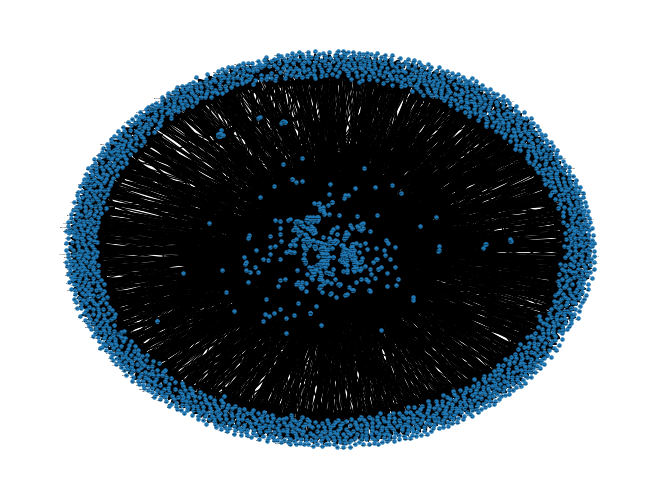

In [5]:
level = 2
wan.get_graph(level=level)

In [6]:
G = nx.read_graphml(f"{word}-{level}.graphml")

print(f"Nodos: {G.number_of_nodes()}")
print(f"Aristas: {G.number_of_edges()}")

net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#222222",
                font_color = "white",
                height = "750px",
                width = "100%",
)

net.from_nx(G)
net.show(f"{word}-{level}.html")

Nodos: 2356
Aristas: 5847
dog-2.html
